# 이미지 표현

## 영상의 종류와 표현 방법

영상은 크게 정지영상(image)과 동영상(movie)으로 구분할 수 있습니다. 

정지영상에는 문자 또는 도형 등을 표현한 2진영상, 흑백사진에 해당하는 회색조(grayscale) 영상, 자연색을 표현한 컬러 영상, 그리고 멀티스펙트럼 영상 등이 있습니다. 

동영상에는 흑백 동영상과 컬러 동영상이 있습니다. 

- 2진 영상 : 검은색과 흰색으로만 표현된 영상 
- 회색조 영상 : 검은색과 흰색, 그리고 검은색과 흰색 사이의 단계를 둔 회색으로 표현된 영상
- 멀티스펙트럼 영상 : 다중분광 영상. 가시광선 외 자외선과 같은 영역의 스펙트럼 정보를 포함한 영상

## 디지털 이미지와 좌표 표현 방법

컴퓨터에 저장된 디지털 이미지는 2차원(x, y) 배열 구조입니다. 

디지털 이미지에서 기준점은 영상의 가장 왼쪽 위 지점이며, 이곳의 좌표는 (0, 0)에 해당합니다. 
오른쪽으로 이동할수록 x 좌표가 커지고, 아래쪽으로 이동할수록 y 좌표가 커집니다.

이미지는 화소(pixel)들로 구성되어 있습니다. 화소 하나는 영상에서 점(point) 하나에 해당합니다. 

### 표본화와 양자화 

- 표본화 : 공간적으로 연속되는 화상을 이산적인 화소의 집합으로 나누는 것
- 양자화 : 이미지의 농담을 이산적인 정수값으로 변환, 조작하는 것

# OpenCV와 이미지 읽기

## OpenCV란?

OpenCV(Open Source Computer Vision)는 오픈소스 컴퓨터 비전 및 기계 학습 소프트웨어 라이브러리입니다. 

OpenCV는 컴퓨터 비전 응용 프로그램을 위한 공통 인터페이스를 제공하고 상용 제품에서 기계 인식의 사용을 쉽고 빠르게 처리하기 위해서 구축되었습니다. OpenCV는 BSD 라이선스 제품이므로 누구든지 무료로 사용할 수 있습니다.

OpenCV는 C++, Java, Python 및 MATLAB 인터페이스가 지원되며 대부분의 주요 운영체제(Windows, Linux, OS X, Android 등)에서 사용 가능합니다. 다만 일부 리눅스 배포판에서는 호환되지 않는 경우도 있으니 주의가 필요합니다. 

In [2]:
# OpenCV 사용하기 (import 및 버전 출력 여부 확인)
import cv2
print(cv2.__version__)

4.7.0


## cv2.imread() 로 이미지 불러오기

cv2.imread()는 이미지 파일을 불러와 넘파이 배열로 반환합니다. 인수로 전달되는 값은 파일 이름과 플래그입니다. 

### cv2.imread(fileName, flags) -> img

- fileName : 이미지 파일의 경로를 지정합니다.
- flags : 이미지 파일을 읽어 들일 때의 옵션 사항을 추가 입력합니다. 
    1. cv2.IMREAD_COLOR : 이미지 파일을 컬러로 읽습니다. 투명한 부분은 무시되며, 기본값입니다. 숫자 1을 사용할 수 있습니다. 
    2. cv2.IMREAD_GRAYSCLAE : 이미지를 회색조로 읽습니다. 숫자 0을 사용할 수 있습니다. 
    3. cv2.IMREAD_UNCHANGED : 이미지를 불투명도(알파)까지 포함하여 읽습니다. 숫자 -1을 사용할 수 있습니다.
    
## cv2.imshow() 로 이미지 출력하기

파일에서 읽은 이미지를 화면에 출력하기 위해 cv2.imshow() 함수를 사용합니다. 

### cv2.imshow(title, image)

- title : 문자열 타입이며 윈도우 창의 제목을 지정합니다. 
- image : 화면에 표시할 이미지 객체입니다. 타입은 numpy의 ndarray입니다. 

### cv2.imshow() partners

일반적으로 imshow()는 다음 함수들과 함께 사용합니다. 

- cv2.waitKey() : 키보드 입력을 대기하는 함수입니다. 인수가 0이면 키 입력까지 무한대기이며 특정 시간 동안 대기하려면 밀리초 값을 인자로 전달합니다.
- cv2.destroyAllWindows() : 화면에 나타난 모든 윈도우를 종료합니다.


In [18]:
# 영상 파일 읽기 및 화면 표시
import cv2
import numpy as np

imageFile = './data/lena.jpg'
img  = cv2.imread(imageFile)    # cv2.IMREAD_COLOR
img2 = cv2.imread(imageFile, 0) # cv2.IMREAD_GRAYSCALE

##encode_img = np.fromfile(imageFile, np.uint8) # 이미지 파일명에 한글 포함되어있을 시
##img = cv2.imdecode(encode_img, cv2.IMREAD_UNCHANGED)

cv2.imshow('Lena color',img)
cv2.imshow('Lena grayscale',img2)

cv2.waitKey()
cv2.destroyAllWindows()

## cv2.imwrite() 로 이미지 저장하기

cv2.imwrite() 함수를 이용하면 배열을 이미지 파일에 저장할 수 있습니다. 파일의 형식은 파일명의 확장자를 통해 지정됩니다.

### cv2.imwrite(fileName, image) -> retval

- fileName : 문자열 타입이며 저장될 파일명을 지정합니다. 
- image : 저장할 이미지 객체입니다. 타입은 numpy의 ndarray입니다. 

In [20]:
# 영상 파일 저장
import cv2

imageFile = './data/lena.jpg'
img = cv2.imread(imageFile) 
cv2.imwrite('./data/Lena.bmp', img)
cv2.imwrite('./data/Lena.png', img)
cv2.imwrite('./data/Lena2.png',img, [cv2.IMWRITE_PNG_COMPRESSION, 9])
cv2.imwrite('./data/Lena2.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 90])

# cv2.imwrite('./data/Lena3.jpg', cv2.IMREAD_GRAYSCALE)

True

## matplotlib 사용해서 이미지 출력하기

맷플롯립 패키지를 이용해서 이미지를 화면에 출력할 수 있습니다. 

### plt.imshow(image)

- image : 출력할 이미지 객체입니다. 타입은 numpy의 ndarray입니다. 

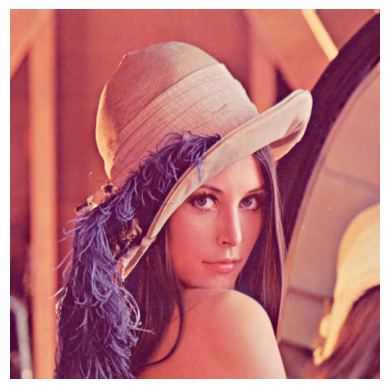

In [21]:
# matplotlib 컬러 영상 표시
import cv2
from matplotlib import pyplot as plt

imageFile = './data/lena.jpg'
imgBGR = cv2.imread(imageFile)
plt.axis('off')

imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

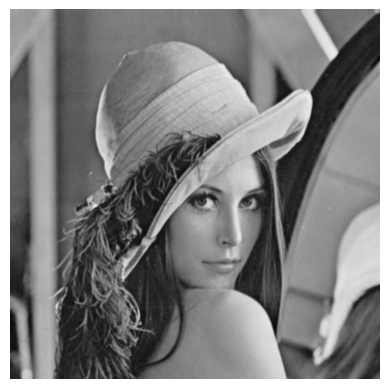

In [22]:
# matplotlib 회색조 영상 표시
import cv2
from matplotlib import pyplot as plt

imageFile = './data/lena.jpg'
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE)
plt.axis('off')

plt.imshow(imgGray, cmap="gray", interpolation='bicubic')
plt.show()

### 이미지 보간(interpolation)법

영상 변환 작업 시 아무런 정보를 받지 못하는 화소를 홀(hole)이라 부릅니다. 이러한 홀을 유도하는 작업을 보간이라 합니다. 

아래에는 matplotlib 공식 홈페이지에서 제공하는 보간법 예제입니다.

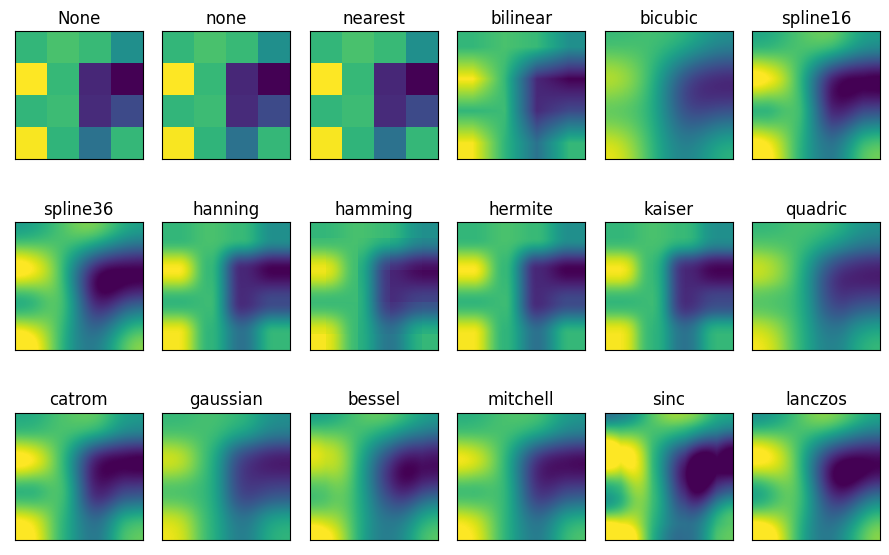

In [24]:
import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

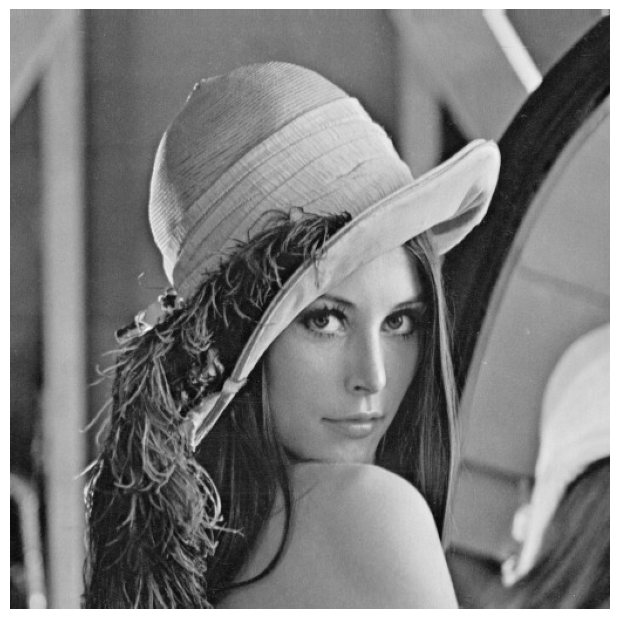

In [23]:
# 여백 조정 및 영상 저장
import cv2
from matplotlib import pyplot as plt

imageFile = './data/lena.jpg'
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(imgGray, cmap='gray')

plt.axis('off')
plt.savefig('./data/0205.png')
plt.show()

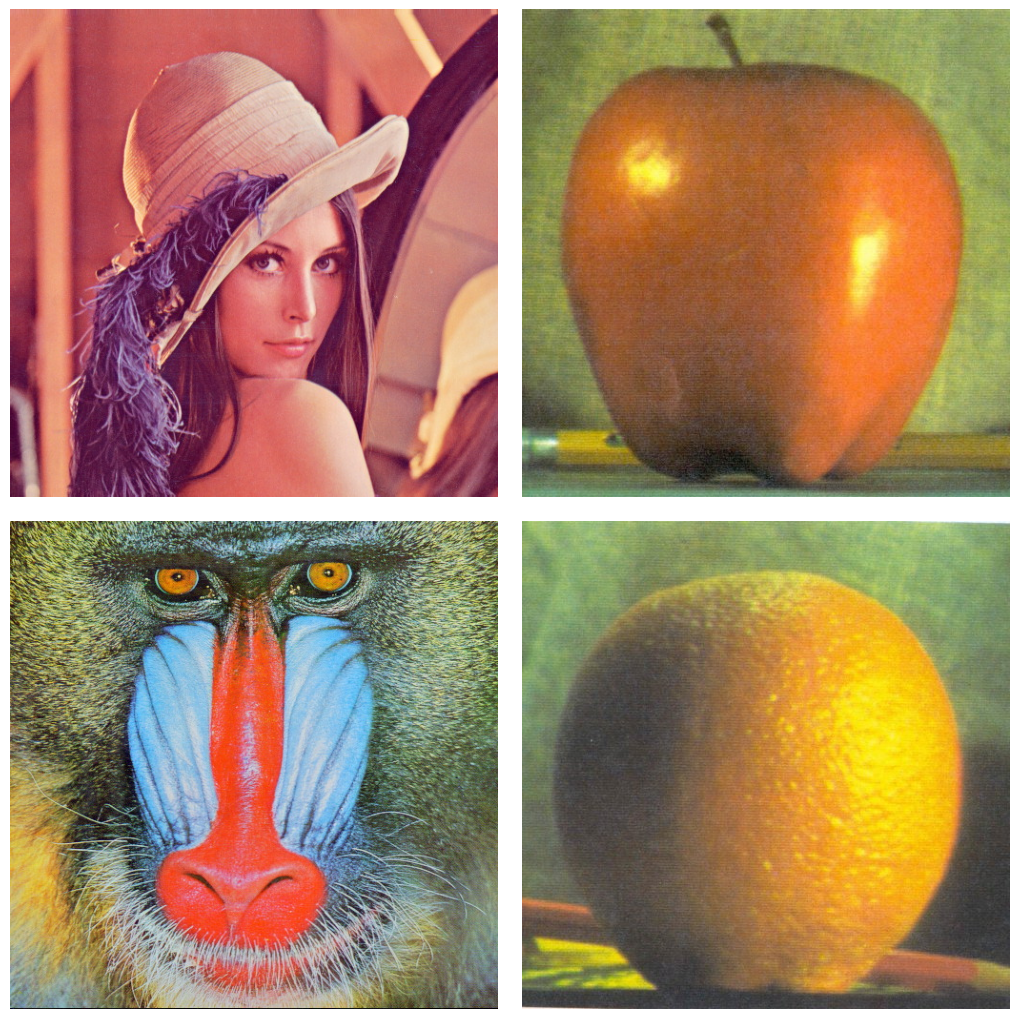

In [25]:
# 서브플롯에 영상 표시
import cv2
from   matplotlib import pyplot as plt

path = './data/'
imgBGR1 = cv2.imread(path+'lena.jpg')
imgBGR2 = cv2.imread(path+'apple.jpg')
imgBGR3 = cv2.imread(path+'baboon.jpg')
imgBGR4 = cv2.imread(path+'orange.jpg')

imgRGB1 = cv2.cvtColor(imgBGR1, cv2.COLOR_BGR2RGB)
imgRGB2 = cv2.cvtColor(imgBGR2, cv2.COLOR_BGR2RGB)
imgRGB3 = cv2.cvtColor(imgBGR3, cv2.COLOR_BGR2RGB)
imgRGB4 = cv2.cvtColor(imgBGR4, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize=(10,10), sharey=True)
fig.canvas.manager.set_window_title('Sample Pictures')

ax[0][0].axis('off')
ax[0][0].imshow(imgRGB1, aspect = 'auto')

ax[0][1].axis('off')
ax[0][1].imshow(imgRGB2, aspect = 'auto')

ax[1][0].axis("off")
ax[1][0].imshow(imgRGB3, aspect = "auto")

ax[1][1].axis("off")
ax[1][1].imshow(imgRGB4, aspect = 'auto')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1,
                    wspace=0.05, hspace=0.05)
plt.savefig("./data/0206.png", bbox_inches='tight') # 여백 없앨라고 하는거
plt.show()


### 주의!

아래 코드의 경우 pafy 내부 문제로 인해 실행이 되지 않고 오류가 난다. 

오류를 고치는 방법은 pafy 패키지 내부 backend_youtube_dl.py 모듈의 53, 54번 라인을 다음과 같이 수정하는 것이다.

self._likes = self._ydl_info.get('like_count',0)
self._dislikes = self._ydl_info.get('dislike_count',0)

In [1]:
# 비디오 입력과 화면표시 : 유튜브 동영상
import cv2, pafy
url = 'https://www.youtube.com/watch?v=u_Q7Dkl7AIk'
video = pafy.new(url)
print('title = ', video.title)
print('video.rating = ', video.rating)
print('video.duration = ', video.duration)

best = video.getbest() # video.getbest(preftype='mp4')
print('best.resolution', best.resolution)

cap=cv2.VideoCapture(best.url)
while (True):
    retval, frame = cap.read()
    if not retval:
            break
    cv2.imshow('frame',frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,100,200)
    cv2.imshow('edges',edges)

    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
cv2.destroyAllWindows()

title =  Jeju Island Korea Travel Guide + Attractions Map
video.rating =  None
video.duration =  00:02:42
best.resolution 1280x720


# 도형 그리기

## 선과 사각형 그리기 

cv2.line() 함수는 선을, cv2.rectangle() 함수는 사각형을 그립니다.

### cv2.line(img, start, end, color, thickness=1)

- img : 도형을 그릴 이미지 객체입니다.
- start : 선의 시작 좌표입니다. (x, y) 형식으로 지정합니다. 
- end : 선의 끝 좌표입니다. (x, y) 형식으로 지정합니다. 
- color : (B, G, R) 형식의 색상값입니다.
- thickness : 선의 두께를 픽셀 단위로 지정합니다.

### cv2.rectangle(img, start, end, color, thickness=1)

- img : 도형을 그릴 이미지 객체입니다.
- start : 사각형의 왼쪽 위 좌표입니다. (x, y) 형식으로 지정합니다. 
- end : 사각형의 오른쪽 아래 좌표입니다. (x, y) 형식으로 지정합니다. 
- color : (B, G, R) 형식의 색상값입니다.
- thickness : 테두리의 두께를 픽셀 단위로 지정합니다. -1이면 사각형의 안쪽을 채웁니다.


In [28]:
# 직선 및 사각형 그리기
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255
#img = np.ones((512,512,3), np.uint8) * 255
#img = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
#img = np.zeros((512,512, 3), np.uint8) # Black 배경
pt1 = 100, 100
pt2 = 400, 400
cv2.rectangle(img, pt1, pt2, (0, 255, 0), 2)

cv2.line(img, (0, 0), (500, 0), (255, 0, 0), 5)
cv2.line(img, (0, 0), (0, 500), (0,0,255), 5)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


## 원 그리기

### cv2.circle(img, center, radius, color, thickness=1)

- img : 도형을 그릴 이미지 객체입니다.
- center : 원의 중심 좌표입니다. (x, y) 형식으로 지정합니다. 
- radius : 반지름을 픽셀 단위 정수로 지정합니다.
- color : (B, G, R) 형식의 색상값입니다.
- thickness : 선의 두께를 픽셀 단위로 지정합니다. -1이면 원의 안쪽을 채웁니다.


In [29]:
# 직선 및 사각형 교차점
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255

x1, x2 = 100, 400
y1, y2 = 100, 400
cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255))

pt1 = 120, 50
pt2 = 300, 500
cv2.line(img, pt1, pt2, (255,0,0), 2)

imgRect = (x1, y1, x2-x1, y2-y1)
retval, rpt1, rpt2 = cv2.clipLine(imgRect, pt1, pt2)
if retval:
    cv2.circle(img, rpt1, radius=5, color=(0, 255, 0), thickness=-1)
    cv2.circle(img, rpt2, radius=5, color=(0, 255, 0), thickness=-1)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [31]:
# 원 그리기
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255
cy = img.shape[0]//2
cx = img.shape[1]//2

for r in range(200, 0, -100):
    cv2.circle(img, (cx, cy), r, color=(255, 0, 0))

cv2.circle(img, (cx, cy), radius=50, color=(0, 0, 255), thickness=-1)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 타원 그리기

### cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness=1)

- img : 도형을 그릴 이미지 객체입니다.
- center : 차원의 중심 좌표입니다. (x, y) 형식으로 지정합니다. 
- axes : 타원의 중심에서 가장 큰 거리와 작은 거리를 픽셀 단위 정수로 지정합니다. (max, min) 형식입니다.
- angle : 타원의 기울기 각도입니다.
- startAngle : 타원의 시작 각도입니다.
- endAngle : 타원의 끝 각도입니다.
- color : (B, G, R) 형식의 색상값입니다.
- thickness : 선의 두께를 픽셀 단위로 지정합니다. -1이면 타원의 안쪽을 채웁니다.

In [32]:
# 타원 그리기
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255
ptCenter = img.shape[1]//2, img.shape[0]//2
size = 200,100

cv2.ellipse(img, ptCenter, size, 0, 0, 360, (255, 0, 0))
cv2.ellipse(img, ptCenter, size, 45, 0, 360, (0, 0, 255))

box = (ptCenter, size, 0)
cv2.ellipse(img, box,  (255, 0, 0), 5)

box = (ptCenter, size, 45)
cv2.ellipse(img, box,  (0, 0, 255), 5)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


## 다각형 그리기

### cv2.polylines(img, points, isClosed, color, thickness=1)

- img : 도형을 그릴 이미지 객체입니다.
- points : 다각형 꼭지점의 좌표들입니다. [[x1, y1], [x2, y2]...] 형식으로 지정합니다.
- isClosed : 불리언 값으로 닫힌 도형인지 아닌지 여부를 지정합니다.
- color : (B, G, R) 형식의 색상값입니다.
- thickness : 선의 두께를 픽셀 단위로 지정합니다. 다각형에서 -1은 사용할 수 없습니다.

In [33]:
# 다각형 그리기
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255

pts1 = np.array([[100, 100], [200, 100], [200, 200], [100, 200]])
pts2 = np.array([[300, 200], [400, 100], [400, 200]])

cv2.polylines(img, [pts1, pts2], isClosed=True, color=(255, 0, 0))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
# 다각형 그리기
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255

ptCenter = img.shape[1]//2, img.shape[0]//2
size = 200,100

cv2.ellipse(img, ptCenter, size, 0, 0, 360, (255, 0, 0))
pts1 = cv2.ellipse2Poly(ptCenter, size,  0, 0, 360, delta=45) # 타원 안에서 다각형으로의 변환

cv2.ellipse(img, ptCenter, size, 45, 0, 360, (255, 0, 0))
pts2 = cv2.ellipse2Poly(ptCenter, size, 45, 0, 360, delta=45) # 타원 안에서 다각형으로의 변환

cv2.polylines(img, [pts1, pts2], isClosed=True, color=(0, 0, 255))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [39]:
# 회전 사각형
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255

x, y = 256, 256
size = 200

for angle in range(0, 90, 10):
    rect = ((256, 256), (size, size), angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)   
    cv2.polylines(img, [box], True, (b, g, r), 2)
    
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [41]:
# 다각형 채우기
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255

pts1 = np.array([[100, 100], [200, 100], [200, 200], [100, 200]])
pts2 = np.array([[300, 200], [400, 100], [400, 200]])

cv2.fillConvexPoly(img, pts1, color=(255, 0, 0))

cv2.fillPoly(img, [pts2], color=(0, 0, 255))
#cv2.fillPoly(img, [pts1, pts2], color=(0, 0, 255))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 문자열 표시하기

### cv2.putText(img, text, org, font, fontScale, color)

- img : 도형을 그릴 이미지 객체입니다.
- text : 표시할 문자열입니다. 
- org : 문자열이 표시될 위치입니다. 문자열의 왼쪽 아래 모서리 지점이 기준입니다.
- font : 폰트를 지정합니다. 형식은 cv2.FONT_XXX 입니다.
- fontScale : 폰트의 크기를 지정합니다.
- color : (B, G, R) 형식의 색상값입니다.

In [43]:
# 문자열 출력
import numpy as np
import cv2

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255
text = 'OpenCV Programming'
org = (50,100)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,text, org, font, 1, (255,0,0), 2)

size, baseLine = cv2.getTextSize(text, font, 1, 2)
#print('size=', size)
#print('baseLine=', baseLine)
cv2.rectangle(img, org, (org[0]+size[0], org[1]-size[1]), (0, 0, 255))
cv2.circle(img, org, 3, (0, 255,0), 2)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

# 이벤트 처리하기

## 키보드 이벤트

키보드 이벤트를 처리하기 위해서는 cv2.waitKey() 함수를 이용해 1바이트 키값을 받거나 cv2.waitKeyEx() 함수를 이용해 2바이트 키값을 받아 이벤트를 처리합니다.

### cv.waitKey(delay=None) -> retval

- delay : 밀리초 단위 대기시간입니다. 0보다 같거나 작은 수를 지정할 경우 무한대기입니다. 기본값 None 또한 무한대기입니다.

반환값은 키보드 입력값으로, 아스키 코드 값입니다.

In [52]:
import numpy as np
import cv2

image = np.zeros((300, 300, 3), np.uint8) + 255

while(1):
    cv2.imshow("Key test", image)
    key = cv2.waitKey(0)
    print(f'Code: {key}, Char: {chr(key)}')
    if key & 0xFF == 27:
        break

cv2.destroyAllWindows()

Code: 0, Char:  
Code: 0, Char:  
Code: 0, Char:  
Code: 0, Char:  
Code: 0, Char:  
Code: 0, Char:  
Code: 0, Char:  
Code: 0, Char:  
Code: 97, Char: a
Code: 97, Char: a
Code: 13, Char: 
Code: 27, Char: 


In [44]:
# 키보드 이벤트 처리
import numpy as np
import cv2

width, height = 512, 512
x, y, R = 256, 256, 50
direction = 0 # right

while True:   
    key = cv2.waitKeyEx(30)    
    if key == 0x1B: 
        break; # ESC
    
# 방향키 방향전환 
    elif key == 0x270000: # right
        direction = 0
    elif key == 0x280000: # down
        direction = 1
    elif key == 0x250000: # left
        direction = 2
    elif key == 0x260000: # up
        direction = 3
        
# 방향으로 이동 
    if direction == 0:     # right
        x += 10
    elif direction == 1:   # down
        y += 10
    elif direction == 2:   # left
        x -= 10
    else: # 3, up
        y -= 10
        
#   경계확인 
    if x < R:
        x = R
        direction = 0
    if x > width - R:
        x = width - R
        direction = 2
    if y < R:
        y = R
        direction = 1
    if y > height - R:
        y = height - R
        direction = 3
        
# 지우고, 그리기        
    img = np.zeros((width, height,3), np.uint8) + 255 # 지우기
    cv2.circle(img, (x, y), R, (0, 0, 255), -1) 
    cv2.imshow('img', img)
    
cv2.destroyAllWindows()


## 마우스 이벤트

OpenCV에는 이미지 처리를 위한 자체 마우스 이벤트 체계가 있습니다. 이벤트 처리는 이벤트 소스와 이벤트 핸들러 두 가지 요소를 통해 진행됩니다. 

- 이벤트 소스 : 이벤트 발생 객체
- 이벤트 핸들러 : 이벤트 발생시 호출되어질 콜백 함수

이벤트 발생시 이벤트 핸들러가 호출되기 위해서는 이벤트 소스와 이벤트 핸들러를 연결하는 이벤트 핸들러 등록 작업이 필수적으로 선행되어야 합니다. 

### cv2.setMouseCallback(windowName, callback, param=None)

- windowName : 창의 이름을 지정합니다 
- callback : 이벤트를 처리할 함수로, 형식이 정해져 있습니다(하단 참조).
- param : 콜백함수에 전달되는 데이터입니다. 

### callback(event, x, y, flags, param)

- event : cv2.EVENT_XXX 형식의 이벤트 속성입니다.  
- x, y : 마우스 이벤트가 발생된 위치입니다. 
- flags : 이벤트가 발생할 떄 키보드나 마우스의 추가적인 상태를 알려줍니다. cv2.EVENT_FLGG_XXX 형식입니다. 

In [46]:
# 마우스 이벤트 처리
import numpy as np
import cv2

def onMouse(event, x, y, flags, param):
##    global img
    if event == cv2.EVENT_LBUTTONDOWN:
        if flags & cv2.EVENT_FLAG_SHIFTKEY:
            cv2.rectangle(param[0], (x-5, y-5), (x+5, y+5), (255, 0, 0))
        else:
            cv2.circle(param[0], (x, y), 5, (255, 0, 0), 3)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(param[0], (x, y), 5, (0, 0, 255), 3)        
    elif event == cv2.EVENT_LBUTTONDBLCLK:
        param[0] = np.zeros(param[0].shape, np.uint8) + 255   
    cv2.imshow("img", param[0])
    
img = np.zeros((512,512,3), np.uint8) + 255
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse, [img])
cv2.waitKey()
cv2.destroyAllWindows()


In [53]:
import cv2
import numpy as np

def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        if flags & cv2.EVENT_FLAG_CTRLKEY:
            cv2.rectangle(img, (x,y), (x+20, y+20), (0,0,255), -1)
        else:
            cv2.rectangle(img, (x,y), (x+20, y+20), (0,255,0), 2)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x,y), 10, (255,0,0), 2)
    elif event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x,y), 20, (255,0,0), -1)
        
img = np.zeros((512,512,3), dtype=np.uint8) + 255
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

## 트랙 바 사용하기 

트랙바(Trackbar)를 이용해서 원하는 색상값을 선택할 수 있습니다. 트랙바 생성과 값 취득은 각각 cv2.createTrackbar() 함수와 cv2.getTrackbarPos() 함수가 담당합니다. 

### cv2.createTrackbar(trackbarName, windowName, value, count, onChange)

- trackbarName : 트랙바 이름입니다. 
- windowName : 트랙바가 등록될 창 이름입니다.
- value : 정수형 값으로 트랙바의 초깃값입니다.
- count : 트랙바의 최댓값입니다. 최솟값은 언제나 0입니다. 
- onChange : 트랙바 슬라이드 변경 시의 콜백 함수입니다. 여기에는 트랙바의 위치값이 인자로 전달됩니다.

### cv2.getTrackbarPos(trackbarName, windowName)

- trackbarName : 트랙바 이름입니다. 
- windowName : 트랙바가 등록될 창 이름입니다.

In [1]:
# 트랙바 이벤트 처리
import numpy as np
import cv2

def onChange(pos): 
    global img
    r = cv2.getTrackbarPos('R','img')
    g = cv2.getTrackbarPos('G','img')
    b = cv2.getTrackbarPos('B','img')                   
    img[:] = (b, g, r)
    cv2.imshow('img', img)

img = np.zeros((512, 512, 3), np.uint8)
cv2.imshow('img',img)

# 트랙바 생성
cv2.createTrackbar('R', 'img', 0, 255, onChange)
cv2.createTrackbar('G', 'img', 0, 255, onChange)
cv2.createTrackbar('B', 'img', 0, 255, onChange)

# 트랙바 위치 초기화
#cv2.setTrackbarPos('R', 'img', 0)
#cv2.setTrackbarPos('G', 'img', 0)
cv2.setTrackbarPos('B', 'img', 255)

cv2.waitKey()
cv2.destroyAllWindows()


In [2]:
# 연습문제 후보
import numpy as np
import cv2


def nothing(x):
    pass

img = np.zeros((200,500,3), np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('Red', 'image', 0, 255, nothing)
cv2.createTrackbar('Green', 'image', 0, 255, nothing)
cv2.createTrackbar('Blue', 'image', 0, 255, nothing)
cv2.createTrackbar('0 or 1', 'image', 0, 1, nothing)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break 

    r = cv2.getTrackbarPos('Red', 'image')
    g = cv2.getTrackbarPos('Green', 'image')
    b = cv2.getTrackbarPos('Blue', 'image')
    s = cv2.getTrackbarPos('0 or 1', 'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()